<a href="https://colab.research.google.com/github/YashasaveeKesarwani99/Machine-Learning-Algo/blob/main/gradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing Gradient Boost Algorithm**

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

**Data preparation**

In [3]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
Y = pd.Series(boston.target)

In [4]:
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

**Model training and Evaluation**

In [6]:
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [7]:
model = gradientregressor.fit(X_train,Y_train)

y_pred = model.predict(X_test)

In [8]:
r2_score(y_pred,Y_test)

0.7295356194781117

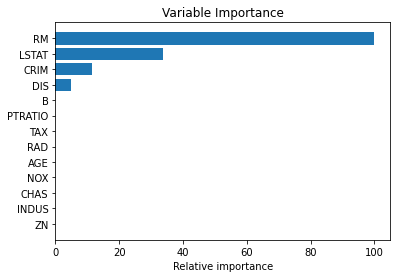

In [13]:
 # seeing feature importance
 import matplotlib.pyplot as plt
 %matplotlib inline

 #plot feature importance 
 feature_importance = model.feature_importances_

 # make importances relative to max importance
 feature_importance = 100.0*(feature_importance/feature_importance.max())
 sorted_idx = np.argsort(feature_importance)
 pos = np.arange(sorted_idx.shape[0]) + 0.5
 plt.barh(pos,feature_importance[sorted_idx],align="center")
 plt.yticks(pos,boston.feature_names[sorted_idx])
 plt.xlabel("Relative importance")
 plt.title("Variable Importance")
 plt.show()

**Hyperparameter Tuning**

In [19]:
 from sklearn.model_selection import GridSearchCV
 LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

 tuning = GridSearchCV(estimator = GradientBoostingRegressor(),
                       param_grid = LR, scoring='r2',cv=10)
 tuning.fit(X_train,Y_train)
 tuning.best_params_,tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 150}, 0.8933905089744958)